# Visulization of Categories

## Load Data and Libraries

In [1]:
# import the library packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# read the csv file
df = pd.read_csv("podcast_episodes.csv")

# turn category into lower case with first letter capital
df['Category'] = df['Category'].str.title()

# exclude year 2019
df = df[df['Date'].str.contains('2019') == False]

df.head()

,Title,Date,Category,Summary,Authors
0,Infinite Tiling Presents a Modern Mathematical...,"OCTOBER 4, 2024",Math,Today’s mathematicians grapple with higher-ord...,"KYNE SANTOS, RACHEL FELTMAN, FONDA MWANGI, MAD..."
1,"Understanding Suzetrigine, a New Drug That Tre...","OCTOBER 2, 2024",Medicine,A new class of drugs treats pain at the periph...,"RACHEL FELTMAN, MARLA BROADFOOT, FONDA MWANGI"
2,An Effort to Fight against the Spread of Misin...,"SEPTEMBER 30, 2024",Technology,Here’s how misinformation and distrust in scie...,"RACHEL FELTMAN, FONDA MWANGI, ANAISSA RUIZ TEJADA"
3,Is Math Part of Nature or an Invention of the ...,"SEPTEMBER 27, 2024",Math,Mathematics communicator and drag queen Kyne S...,"KYNE SANTOS, RACHEL FELTMAN, FONDA MWANGI, MAD..."
4,People with PCOS Face Increased Eating Disorde...,"SEPTEMBER 25, 2024",Health Care,A study reports higher prevalence of eating di...,"RACHEL FELTMAN, FONDA MWANGI, JEFFERY DELVISCIO"


## Data Cleaning
1. filter out data after May 3rd, 2024
2. map categories to broader one

In [3]:
# read the csv file
df = pd.read_csv("podcast_episodes.csv")

# turn category into lower case with first letter capital
df['Category'] = df['Category'].str.title()

#  extract data after May 3rd, 2024 (this is the relaunch date of the podcast)
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'].dt.strftime('%Y-%m-%d') >= '2024-05-03']

df.head()

/var/folders/n9/kzlb0rr55g9bjhgbfqrppvmr0000gn/T/ipykernel_28603/287603003.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Title,Date,Category,Summary,Authors
0,Infinite Tiling Presents a Modern Mathematical...,2024-10-04,Math,Today’s mathematicians grapple with higher-ord...,"KYNE SANTOS, RACHEL FELTMAN, FONDA MWANGI, MAD..."
1,"Understanding Suzetrigine, a New Drug That Tre...",2024-10-02,Medicine,A new class of drugs treats pain at the periph...,"RACHEL FELTMAN, MARLA BROADFOOT, FONDA MWANGI"
2,An Effort to Fight against the Spread of Misin...,2024-09-30,Technology,Here’s how misinformation and distrust in scie...,"RACHEL FELTMAN, FONDA MWANGI, ANAISSA RUIZ TEJADA"
3,Is Math Part of Nature or an Invention of the ...,2024-09-27,Math,Mathematics communicator and drag queen Kyne S...,"KYNE SANTOS, RACHEL FELTMAN, FONDA MWANGI, MAD..."
4,People with PCOS Face Increased Eating Disorde...,2024-09-25,Health Care,A study reports higher prevalence of eating di...,"RACHEL FELTMAN, FONDA MWANGI, JEFFERY DELVISCIO"


In [4]:
# deal with categories
# list out all the categories
category = df['Category'].unique()
print(category)

# # remove "September 18, 2024" category
df = df[df['Category'] != 'September 18, 2024']

# # combine similar categories
# df['Category'] = df['Category'].replace('Climate Change, and Human Impact', 'Climate Change')

# define new categories
# we have AI and Technology, Social Science, Climate and Environment, 
# Health and Wellness, and Space Science

# create a dictionary to map the old categories to the new categories
# Define the category mapping
category_mapping = {
    'Math': 'Mathematics',
    'Medicine': 'Health and Medicine',
    'Technology': 'Technology and AI',
    'Health Care': 'Health and Medicine',
    'Public Health': 'Health and Medicine',
    'Artificial Intelligence': 'Technology and AI',
    'Spacecraft': 'Space and Astronomy',
    'Space & Physics': 'Space and Astronomy',
    'Space Exploration': 'Space and Astronomy',
    'Aging': 'Health and Medicine',
    'Plants': 'Life Sciences',
    'Social Sciences': 'Social Sciences',
    'Oceans': 'Earth and Environment',
    'Environment': 'Earth and Environment',
    'Archaeology': 'Social Sciences',
    'Health': 'Health and Medicine',
    'Neuroscience': 'Life Sciences',
    'Climate Change': 'Earth and Environment',
    'Animals': 'Life Sciences',
    'Fossil Fuels': 'Earth and Environment',
    'Weather': 'Earth and Environment',
    'Nuclear Weapons': 'Technology and AI',
    'Food': 'Life Sciences',
    'Conservation': 'Earth and Environment',
    'Marijuana': 'Health and Medicine',
    'Culture': 'Social Sciences'
}


# Apply the mapping to create a new 'Broad Category' column
df['Broad Category'] = df['Category'].map(category_mapping)

# print unique category and broad category
print("\nUnique categories after mapping and cleaning:")
print(df['Category'].unique())
print("\nUnique broad categories after mapping and cleaning:")
print(df['Broad Category'].unique())


['Math' 'Medicine' 'Technology' 'Health Care' 'Public Health'
 'September 18, 2024' 'Artificial Intelligence' 'Spacecraft'
 'Space & Physics' 'Aging' 'Plants' 'Social Sciences' 'Oceans'
 'Environment' 'Archaeology' 'Health' 'Neuroscience' 'Space Exploration'
 'Climate Change' 'Animals' 'Fossil Fuels' 'Weather' 'Nuclear Weapons'
 'Food' 'Conservation' 'Marijuana' 'Culture']

Unique categories after mapping and cleaning:
['Math' 'Medicine' 'Technology' 'Health Care' 'Public Health'
 'Artificial Intelligence' 'Spacecraft' 'Space & Physics' 'Aging' 'Plants'
 'Social Sciences' 'Oceans' 'Environment' 'Archaeology' 'Health'
 'Neuroscience' 'Space Exploration' 'Climate Change' 'Animals'
 'Fossil Fuels' 'Weather' 'Nuclear Weapons' 'Food' 'Conservation'
 'Marijuana' 'Culture']

Unique broad categories after mapping and cleaning:
['Mathematics' 'Health and Medicine' 'Technology and AI'
 'Space and Astronomy' 'Life Sciences' 'Social Sciences'
 'Earth and Environment']


In [5]:
# print unique pair of category and broad category sort by broad category
print(df[['Category', 'Broad Category']].drop_duplicates().sort_values(by='Broad Category'))

# calculate number of categories
broad_category = df['Broad Category'].unique()
print(broad_category)

                   Category         Broad Category
19              Environment  Earth and Environment
52             Conservation  Earth and Environment
40                  Weather  Earth and Environment
37             Fossil Fuels  Earth and Environment
18                   Oceans  Earth and Environment
35           Climate Change  Earth and Environment
1                  Medicine    Health and Medicine
4               Health Care    Health and Medicine
5             Public Health    Health and Medicine
12                    Aging    Health and Medicine
57                Marijuana    Health and Medicine
27                   Health    Health and Medicine
49                     Food          Life Sciences
15                   Plants          Life Sciences
36                  Animals          Life Sciences
30             Neuroscience          Life Sciences
0                      Math            Mathematics
23              Archaeology        Social Sciences
17          Social Sciences    

## Visulization

/var/folders/n9/kzlb0rr55g9bjhgbfqrppvmr0000gn/T/ipykernel_28603/1093061897.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=broad_category_counts_sorted.index, y=broad_category_counts_sorted.values, palette=colors)


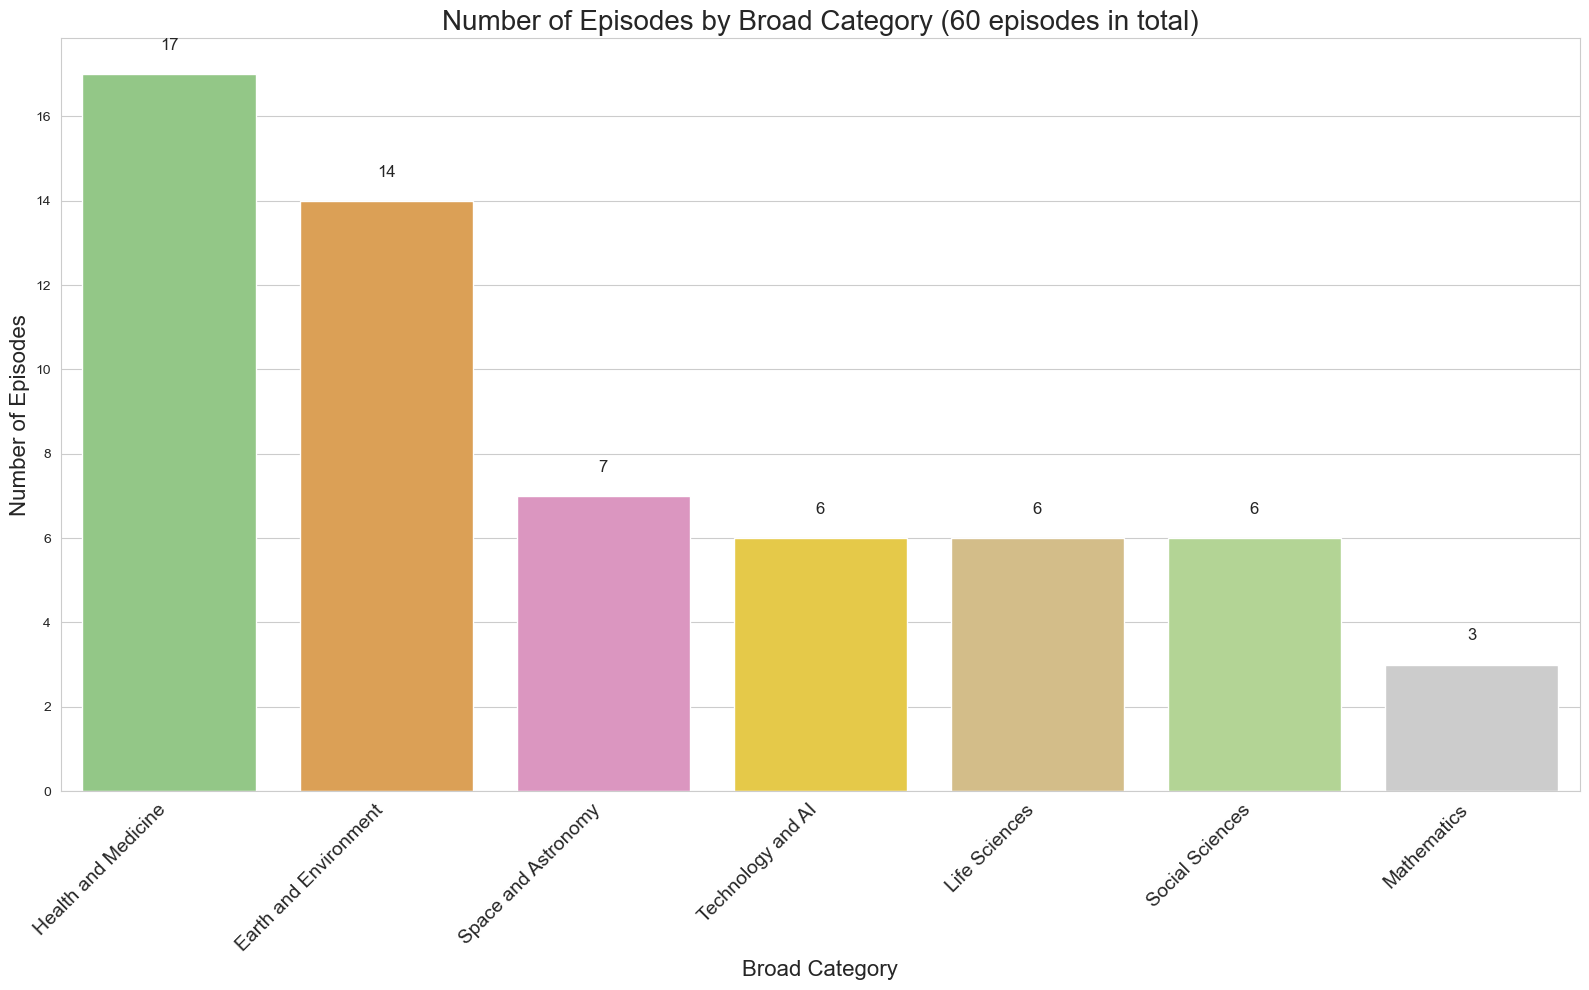

Total number of broad categories: 7


In [6]:
# Define the color mapping based on the image
color_mapping = {
    'Health and Medicine': '#8CD17D',
    'Earth and Environment': '#F1A340',
    'Mathematics and Physics': '#A6CEE3',
    'Space and Astronomy': '#E78AC3',
    'Social Sciences': '#B2DF8A',
    'Technology and AI': '#FFD92F',
    'Life Sciences': '#DFC27D'
}

# Count the number of episodes per broad category
broad_category_counts = df['Broad Category'].value_counts()

# Sort the categories by count in descending order
broad_category_counts_sorted = broad_category_counts.sort_values(ascending=False)

# Create a list of colors in the same order as the sorted categories
colors = [color_mapping.get(cat, '#CCCCCC') for cat in broad_category_counts_sorted.index]

# Create the bar chart
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

ax = sns.barplot(x=broad_category_counts_sorted.index, y=broad_category_counts_sorted.values, palette=colors)

plt.title('Number of Episodes by Broad Category (60 episodes in total)', fontsize=20)
plt.xlabel('Broad Category', fontsize=16)
plt.ylabel('Number of Episodes', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Add value labels on top of each bar
for i, v in enumerate(broad_category_counts_sorted.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Print the total number of broad categories
print(f"Total number of broad categories: {len(broad_category_counts)}")


/var/folders/n9/kzlb0rr55g9bjhgbfqrppvmr0000gn/T/ipykernel_28603/2816388796.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Count', data=category_data,


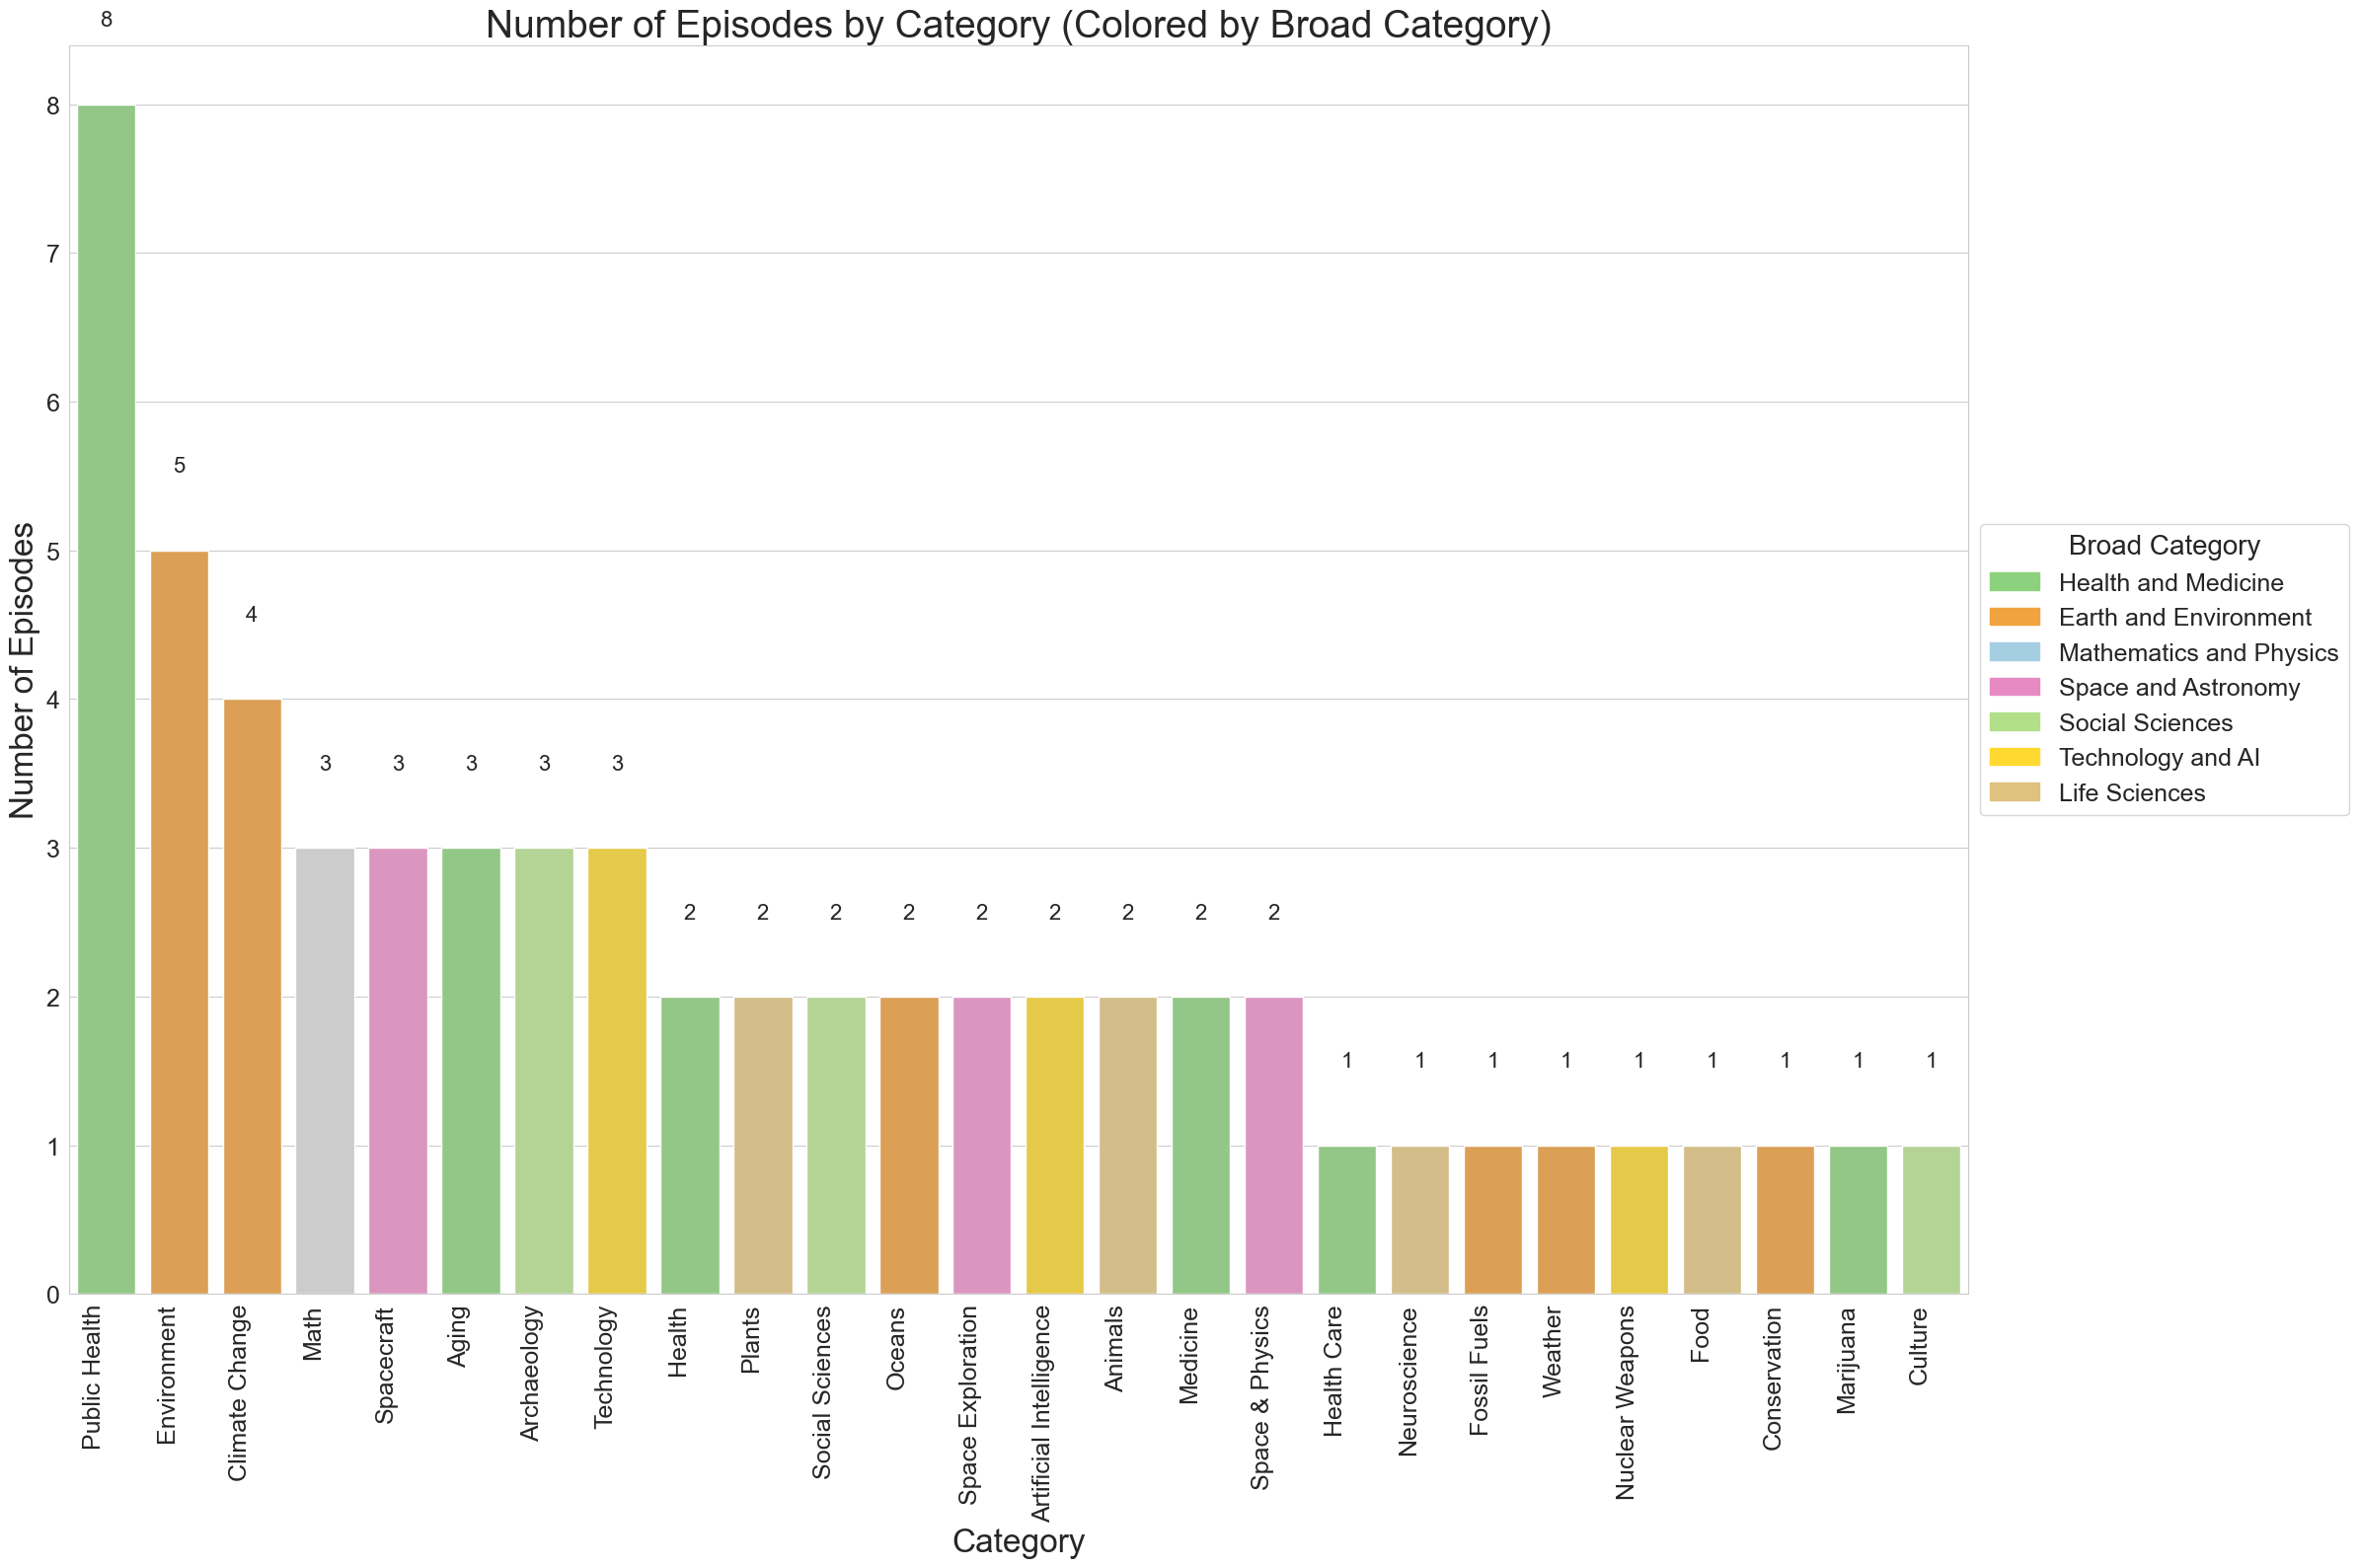

Total number of categories: 26


In [7]:
# Define the color mapping based on the image
color_mapping = {
    'Health and Medicine': '#8CD17D',
    'Earth and Environment': '#F1A340',
    'Mathematics and Physics': '#A6CEE3',
    'Space and Astronomy': '#E78AC3',
    'Social Sciences': '#B2DF8A',
    'Technology and AI': '#FFD92F',
    'Life Sciences': '#DFC27D'
}

# Count the number of episodes per category
category_counts = df['Category'].value_counts()

# Sort the categories by count in descending order
category_counts_sorted = category_counts.sort_values(ascending=False)

# Create a DataFrame with category counts and their broad categories
category_data = pd.DataFrame({
    'Category': category_counts_sorted.index,
    'Count': category_counts_sorted.values,
    'Broad Category': [category_mapping.get(cat, 'Other') for cat in category_counts_sorted.index]
})

# Create the bar chart
plt.figure(figsize=(24, 16))
sns.set_style("whitegrid")

ax = sns.barplot(x='Category', y='Count', data=category_data, 
                 palette=[color_mapping.get(bc, '#CCCCCC') for bc in category_data['Broad Category']])

plt.title('Number of Episodes by Category (Colored by Broad Category)', fontsize=28)
plt.xlabel('Category', fontsize=24)
plt.ylabel('Number of Episodes', fontsize=24)
plt.xticks(rotation=90, ha='right', fontsize=18)
plt.yticks(fontsize=18)

# Add value labels on top of each bar
for i, v in enumerate(category_data['Count']):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=16)

# Add a legend for broad categories
handles = [plt.Rectangle((0,0),1,1, color=color_mapping[label]) for label in color_mapping.keys()]
plt.legend(handles, color_mapping.keys(), title='Broad Category', 
           loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18, title_fontsize=20)

plt.tight_layout()
plt.show()

# Print the total number of categories
print(f"Total number of categories: {len(category_counts)}")